<a href="https://colab.research.google.com/github/shubhh-eagle/Movie-Recommender-Model-and-Analysis/blob/main/Movie_Recommender_system_using_kNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MOVIE RECOMMENDER SYSTEM USING KNN

##Movie Recommender System
1. Based on previous(past) behaviours, it predicts the likelihood that a user would prefer an item.
2. For example, Netflix uses recommendation system. It suggest people new movies according to their past activities that are like watching and voting movies.
3. The purpose of recommender systems is recommending new things that are not seen before from people.
4. There are several methods in recommendation systems - Collaborative filtering, content filtering , hybrid filtering and many more

##Collaborative Filtering:
Collaborative filtering approach builds a model from a user’s past behaviors (items previously purchased or selected and/or numerical ratings given to those items) as well as similar decisions made by other users. This model is then used to predict items (or ratings for items) that the user may have an interest in.

##KNN
KNN is a non-parametric, lazy learning method. It uses a database in which the data points are separated into several clusters to make inference for new samples.
KNN does not make any assumptions on the underlying data distribution but it relies on item feature similarity. When KNN makes inference about a movie, KNN will calculate the “distance” between the target movie and every other movie in its database, then it ranks its distances and returns the top K nearest neighbor movies as the most similar movie recommendations.


![knn picture](https://drive.google.com/file/d/1PAtDtZlhIKqVBLs8fVAzACDyXVbzAVux/view?usp=sharing)

KNN is based on Cosine Similarity Principle and euclidean distance

![cosine similarity picture](https://drive.google.com/file/d/1NVsO8FDO9rJ2CglA1Sh9o_G_W-X8mvwv/view?usp=sharing)

Mouting gdrive on colab notebook to access dataset on gdrive

1. Run the cell and click on link

2. Authorize yourself by clicking on your mailid and then sign in 

3. Copy the link  and paste on authorization code input box

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


##Python libraries used:

###Pandas :
pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language

###Numpy : 
NumPy, which stands for Numerical Python, is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. Using NumPy, mathematical and logical operations on arrays can be performed.

###Matplotlib: 
Matplotlib is an amazing visualization library in Python for 2D plots of arrays. Matplotlib is a multi-platform data visualization library built on NumPy arrays and designed to work with the broader SciPy stack. Matplotlib consists of several plots like line, bar, scatter, histogram etc.

###Scikit Learn:
Scikit-learn is a key library for the Python programming language that is typically used in machine learning projects. Scikit-learn is focused on machine learning tools including mathematical, statistical and general purpose algorithms that form the basis for many machine learning technologies

###Scipy:
SciPy is a scientific computation library that uses NumPy underneath. SciPy stands for Scientific Python. It provides more utility functions for optimization, stats and signal processing.

In [ ]:
import pandas as pd
import numpy as np

###Path for datset in gdrive

####Dataset source link : https://grouplens.org/datasets/movielens/

In [ ]:
movie_path = '/content/drive/MyDrive/projects/movie recommder/movies.csv'
rating_path = '/content/drive/MyDrive/projects/movie recommder/ratings.csv'

###Loading csv dataset

csv: (comma-separated values) file is a text file that has a specific format which allows data to be saved in a table structured format.

In [ ]:
movies_df = pd.read_csv(movie_path)
rating_df = pd.read_csv(rating_path)

In [ ]:
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


###Conversion of genres object or string which was list like structure to proper list

In [ ]:
movies_df['genres'] = movies_df['genres'].str.split('|')
movies_df

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]"
9739,193585,Flint (2017),[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]"


###Separating genres which were separated by commas in list , and separate record for separate genre tag , breaking down of normal form; unnesting column genre

In [ ]:
movies_df = movies_df.explode('genres')
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
...,...,...,...
9738,193583,No Game No Life: Zero (2017),Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Animation


###Genres wise division of dataset

In [ ]:
gen_df = movies_df.groupby('genres')
new_gen = gen_df['title'].count().sort_values(ascending = False)
new_gen

genres
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: title, dtype: int64

In [ ]:
#for better graph, not picking last 3 genres
new_gen = new_gen[0:-3]

In [ ]:
print("Index - different genre : ")
print(new_gen.index)      #from the group by genres, index would be the genre name
print("Value - genre count : ")
print(new_gen.values)      #from the group by genres, values would be the genre count in all movies

Index - different genre : 
Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure',
       'Crime', 'Sci-Fi', 'Horror', 'Fantasy', 'Children', 'Animation',
       'Mystery', 'Documentary', 'War', 'Musical', 'Western'],
      dtype='object', name='genres')
Value - genre count : 
[4361 3756 1894 1828 1596 1263 1199  980  978  779  664  611  573  440
  382  334  167]


###PERCENTAGE OF VARIOUS GENRES IN WHOLE MOVIE DATASET

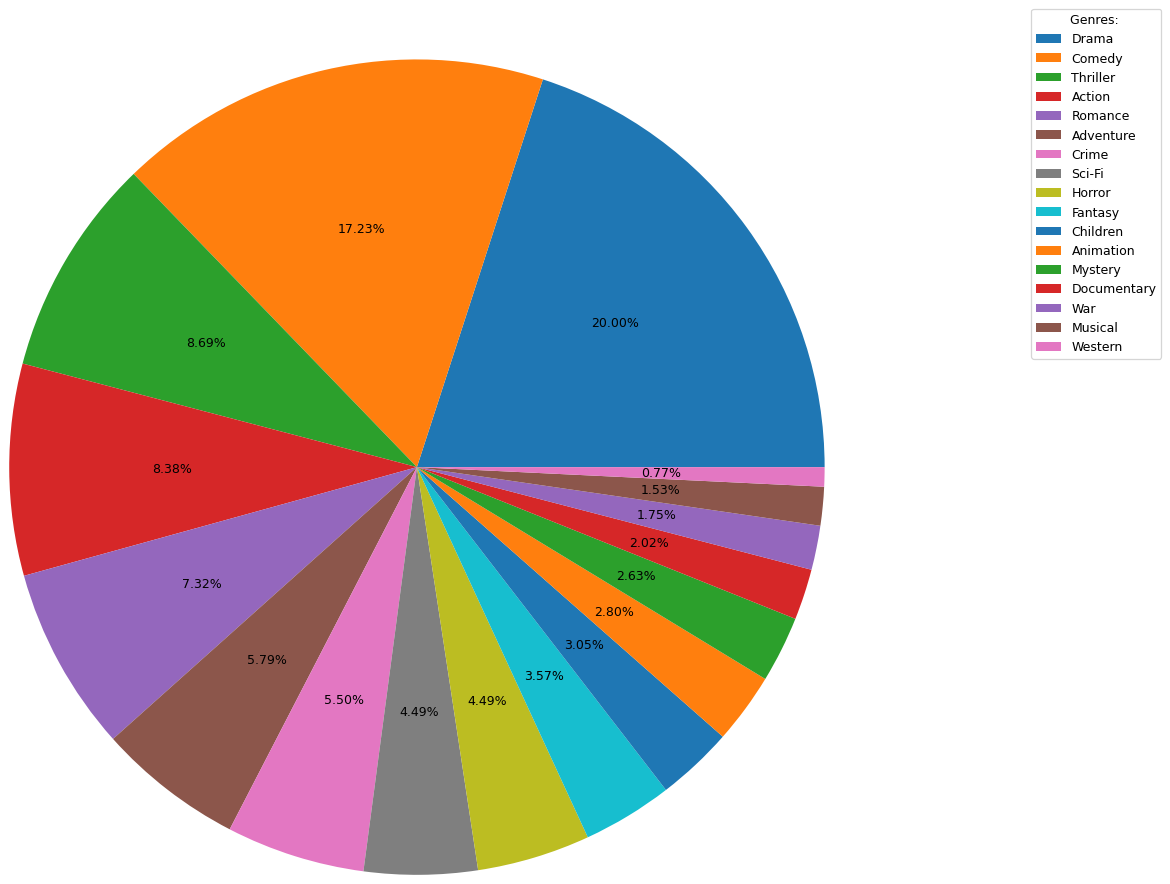

In [ ]:
#pie graph
import matplotlib.pyplot as plt

y = new_gen.values
mylabels = new_gen.index

plt.figure(figsize=(7, 5), dpi=90)

#with labels
#plt.pie(y, labels = mylabels,autopct='%1.2f%%',radius = 3)
#plt.legend(title = "Genres: ",loc = "right")

#without labels
plt.pie(y,autopct='%1.2f%%' ,radius = 3)
plt.legend(title = "Genres: ", labels = mylabels, loc = "lower center", bbox_to_anchor=(2.5, 0.8), ncol= 1)

plt.show() 

###Dropping unnecessary columns and converting datatypes to their required less size datatype 

In [ ]:
#movies_df = pd.read_csv(movie_path,usecols=['movieId','title'],dtype={'movieId': 'int32', 'title': 'str'})
rating_df=pd.read_csv(rating_path,usecols=['userId', 'movieId', 'rating'],dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [ ]:
movies_df.drop(columns = ["genres"], inplace = True)

In [ ]:
convert_type = {"movieId" : "int32", "title" : str}
#unique data 
movies_df.drop_duplicates(inplace = True)
movies_df = movies_df.astype(convert_type,copy = False)

In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9742 entries, 0 to 9741
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int32 
 1   title    9742 non-null   object
dtypes: int32(1), object(1)
memory usage: 190.3+ KB


In [ ]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int32  
 1   movieId  100836 non-null  int32  
 2   rating   100836 non-null  float32
dtypes: float32(1), int32(2)
memory usage: 1.2 MB


In [ ]:
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [ ]:
rating_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


###Merging the two datasets on common column movieID

In [ ]:
df = pd.merge(rating_df,movies_df,on='movieId')
df.head(20)

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)
5,18,1,3.5,Toy Story (1995)
6,19,1,4.0,Toy Story (1995)
7,21,1,3.5,Toy Story (1995)
8,27,1,3.0,Toy Story (1995)
9,31,1,5.0,Toy Story (1995)


In [ ]:
combine_movie_rating = df.dropna(axis = 0, subset = ['title'])
combine_movie_rating.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


###Calculating total rating count for each movie

In [ ]:
movie_ratingCount = (combine_movie_rating.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
movie_ratingCount

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2
...,...,...
9714,eXistenZ (1999),22
9715,xXx (2002),24
9716,xXx: State of the Union (2005),5
9717,¡Three Amigos! (1986),26


In [ ]:
xpoints = movie_ratingCount['title']
ypoints = movie_ratingCount['totalRatingCount']

print("movie title list: ")
print(xpoints)
print()
print("total rating count list: ")
print(ypoints)

movie title list: 
0                                      '71 (2014)
1         'Hellboy': The Seeds of Creation (2004)
2                          'Round Midnight (1986)
3                             'Salem's Lot (2004)
4                       'Til There Was You (1997)
                          ...                    
9714                              eXistenZ (1999)
9715                                   xXx (2002)
9716               xXx: State of the Union (2005)
9717                        ¡Three Amigos! (1986)
9718    À nous la liberté (Freedom for Us) (1931)
Name: title, Length: 9719, dtype: object

total rating count list: 
0        1
1        1
2        2
3        1
4        2
        ..
9714    22
9715    24
9716     5
9717    26
9718     1
Name: totalRatingCount, Length: 9719, dtype: int64


In [ ]:
ratingCount_wise_movieCount = movie_ratingCount.groupby('totalRatingCount')
ratingCount_wise_movieCount = ratingCount_wise_movieCount['title'].count()
ratingCount_wise_movieCount

totalRatingCount
1      3441
2      1298
3       800
4       529
5       383
       ... 
278       1
279       1
307       1
317       1
329       1
Name: title, Length: 177, dtype: int64

###This analysis shows that ***what is the count of movies being rated by certain amount of users***

for ex-  
there are 3441 movies which are rated by 1 person each 

1298 movies are rated by 2 person 

and so on ..

.

1 movie rated by 317 persons

1 movie rated by 329 persons

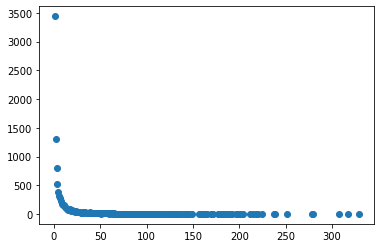

In [ ]:
plt.scatter(ratingCount_wise_movieCount.index, ratingCount_wise_movieCount.values)
plt.show()

From the graph we conclude that **there are less movies which are rated by more users**

In [ ]:
rating_with_totalRatingCount = combine_movie_rating.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(movie_ratingCount['totalRatingCount'].describe())

count   9719.000
mean      10.375
std       22.406
min        1.000
25%        1.000
50%        3.000
75%        9.000
max      329.000
Name: totalRatingCount, dtype: float64


In [ ]:
rating_with_totalRatingCount.shape

(100836, 5)

###Considering the movies which have total rating count above certain threshold value count

In [ ]:
popularity_threshold = 50
rating_popular_movie= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.000,Toy Story (1995),215
1,5,1,4.000,Toy Story (1995),215
2,7,1,4.500,Toy Story (1995),215
3,15,1,2.500,Toy Story (1995),215
4,17,1,4.500,Toy Story (1995),215


In [ ]:
rating_popular_movie.shape

(41362, 5)

###Checking for total null values throughout the dataframe

In [ ]:
rating_popular_movie.isnull()
rating_popular_movie.isnull().sum().sum()

0

In [ ]:
null_columns=rating_popular_movie.columns[rating_popular_movie.isnull().any()]
rating_popular_movie[null_columns].isnull().sum()

Series([], dtype: float64)

###Making the Pivot matrix having ratings given by user of userId as column and movie title as row

In [ ]:
movie_features_df=rating_popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,570,571,572,573,574,575,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,3.000,3.000,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,5.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,3.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,2.000,3.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,...,0.000,0.000,5.000,0.000,0.000,0.000,3.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,5.000,4.000,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000,0.000,0.000,1.500,0.000,0.000,0.000,0.000,0.000,3.000,4.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,4.500,0.000,0.000,0.000,0.000,0.000,4.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,3.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,0.000,3.500,0.000,0.000,4.000,0.000,0.000,0.000,4.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,4.500,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000


###Applying KNN to the pivot matrix

In [ ]:
from scipy.sparse import csr_matrix

movie_features_df_matrix = csr_matrix(movie_features_df.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
movie_features_df.shape

(450, 606)

In [ ]:
movie_features_df.shape[0]

450

###Finding index of the desired movie from the pivot matrix

In [ ]:
desired_movie = input("Movie watching right now: ")
only_movies = movie_features_df.index.tolist()
if desired_movie in only_movies:
  query_index = only_movies.index(desired_movie)
  #print(query_index)
else:
  print("movie not found")

Movie watching right now: 28 Days Later (2002)


In [ ]:
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 28 Days Later (2002):

1: Children of Men (2006), with distance of 0.44748562574386597
2: Donnie Darko (2001), with distance of 0.45180463790893555
3: Shaun of the Dead (2004), with distance of 0.47010862827301025
4: Scarface (1983), with distance of 0.5088632106781006
5: War of the Worlds (2005), with distance of 0.5243829488754272


##References:-


1.   Krish Naik Youtube channel
2.   pandas documentation
3. matplotlib documentation
4.   gfg
5.   programwiz
6. w3schools
7.   stackoverflow
8. analyticsvidya
9. kaggle
10. mygreatlearning




##Improvements/Future work that can be done:-

1. Movie name search by movie name part not exact movie
2. Calculating error in the technique
3. Optimization using cuckoo search algorithm
4. Implement using webframework - flask or django
5. On go connected with real time movie watching and collecting its data as user experience dataset